In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/precio/dflimpio.csv", index_col = 0)
df.head(2)

,Nombre jugador,Equipo actual,edad,pais,Valoración actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia tiro,Agresividad,Defensa,Portería
0,gaston-alvarez,getafe-cf,21,Uruguay,70,80,3300000,54,47,62,35,65,67,10
1,abdessamad-ezzalzouli,fc-barcelona,19,Morocco,70,83,3800000,59,80,84,65,34,25,7


Eliminamos nulos, pues en la exploración de datos solo observamos 8. De este modo, entendemos asumible eliminarlos.

In [3]:
df = df.dropna(how = "any")

In [4]:
df_numericas = df.select_dtypes(include=np.number)

In [5]:
df_numericas.head(2)

,edad,Valoración actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia tiro,Agresividad,Defensa,Portería
0,21,70,80,3300000,54,47,62,35,65,67,10
1,19,70,83,3800000,59,80,84,65,34,25,7


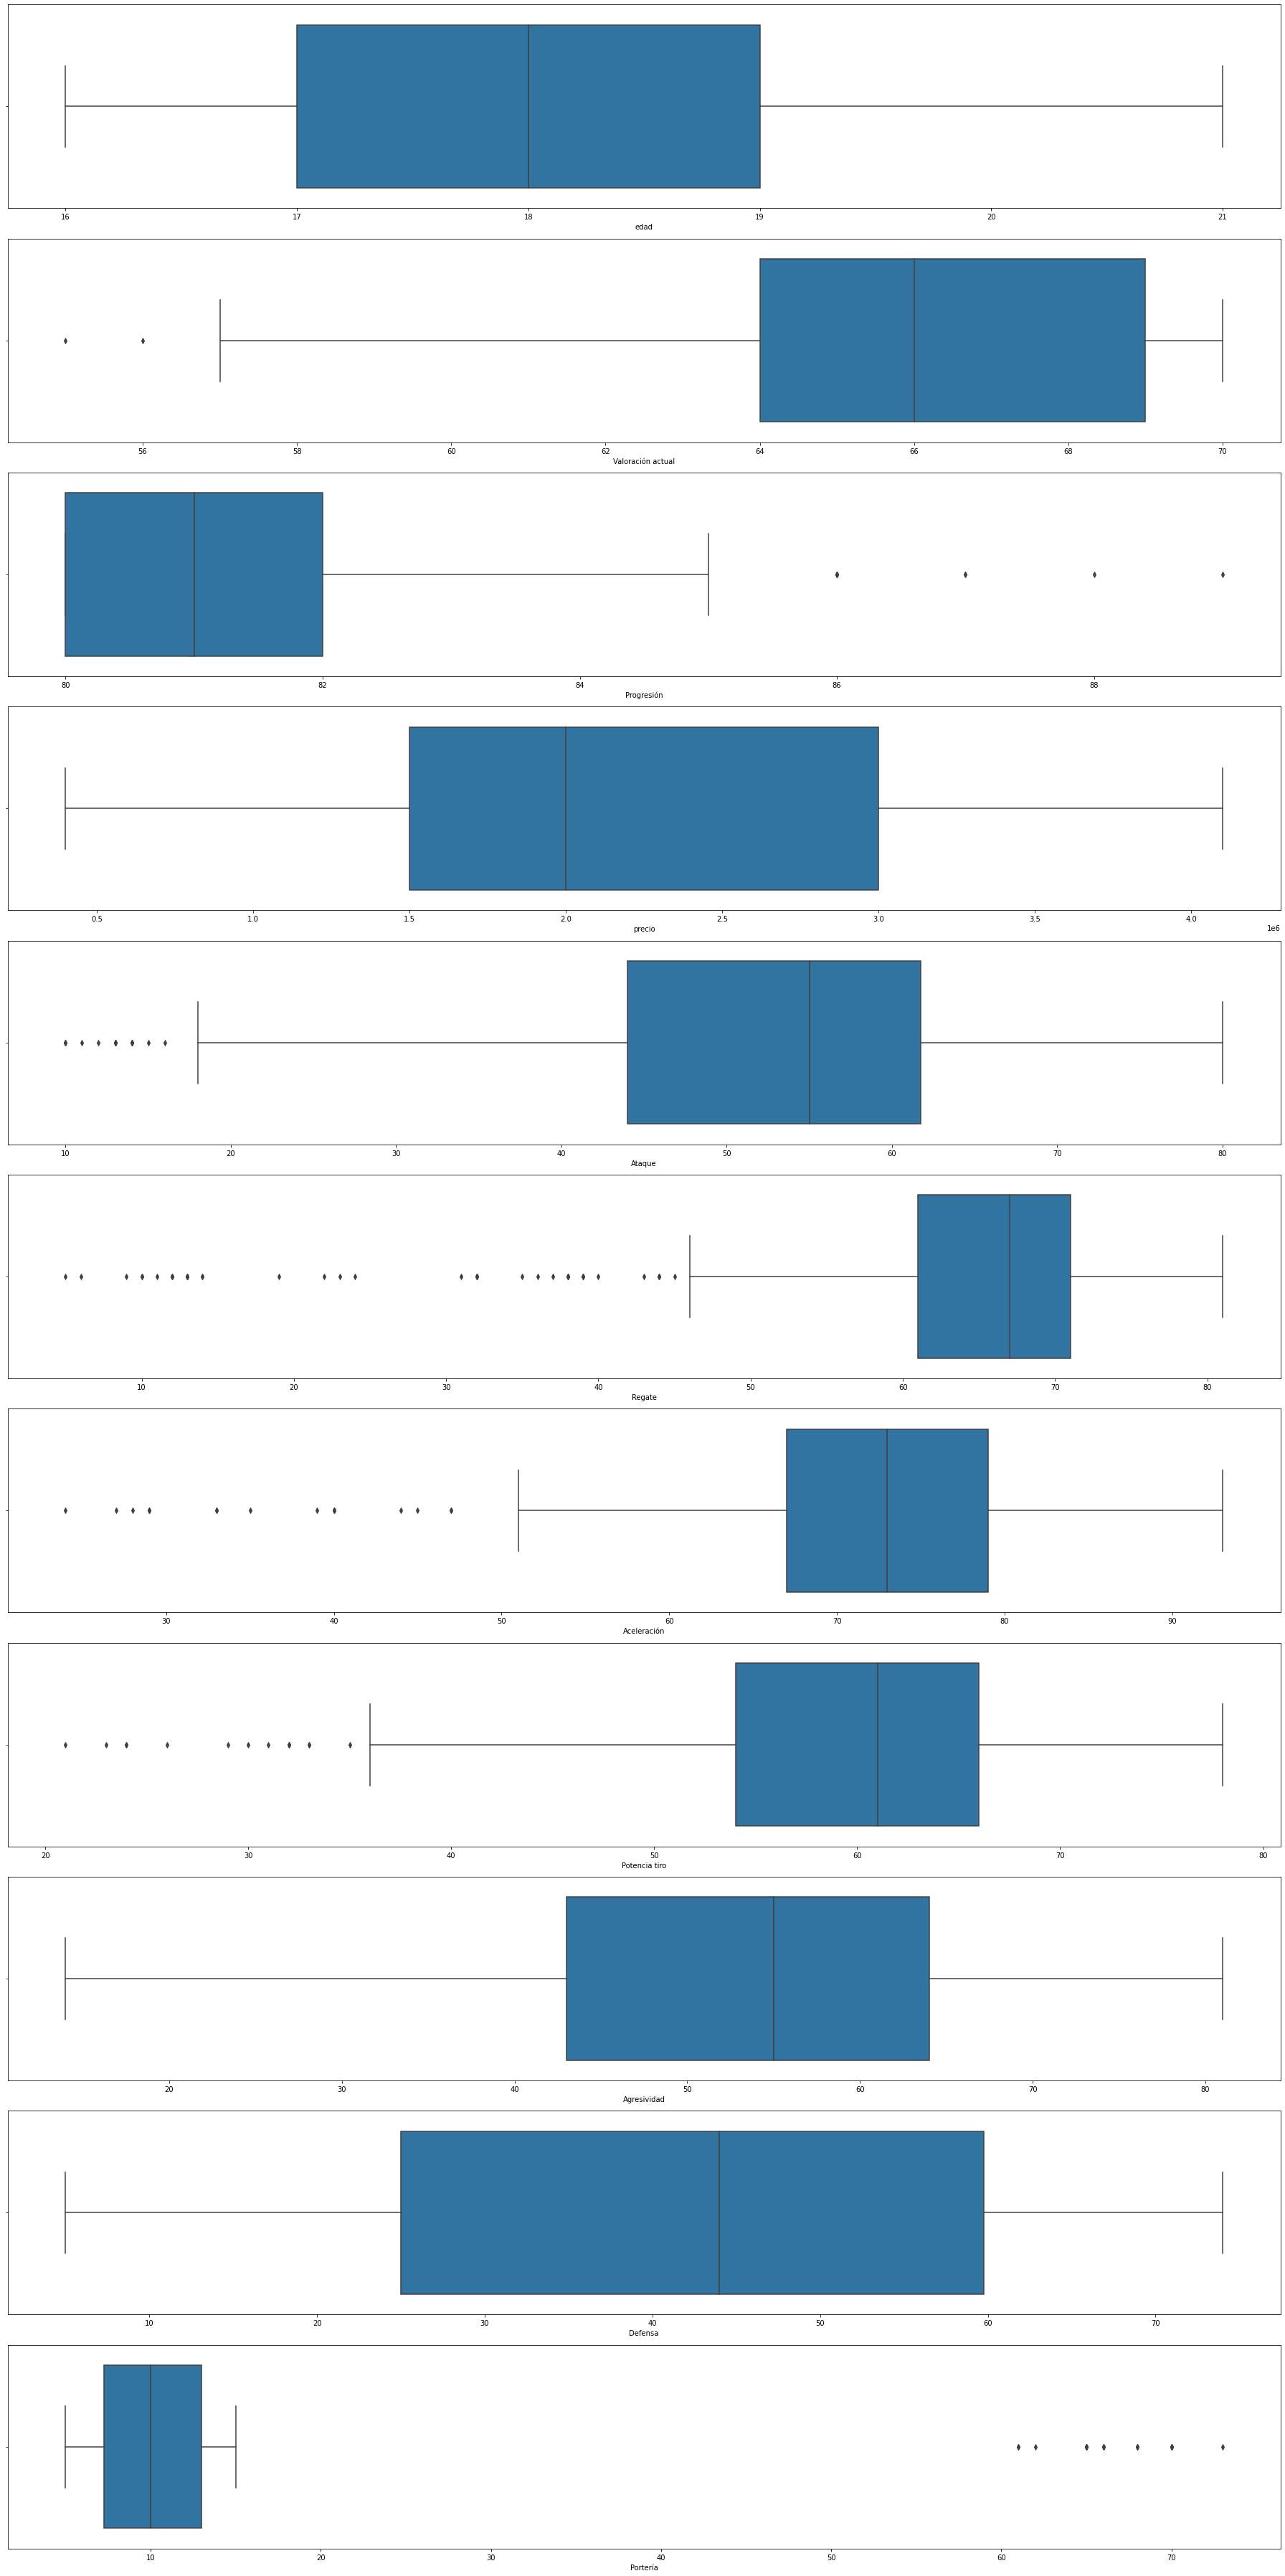

In [6]:
fig, ax = plt.subplots(11, 1, figsize=(25,50))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    
plt.tight_layout()

plt.show()

Eliminamos portería porque sería necesario realizar su método de manera independiente, pues no cumple las características normales medidas en un jugador.

In [7]:
df = df.drop(['Portería'], axis=1)

In [8]:
df[df['Valoración actual'] < 57].count()

Nombre jugador       2
Equipo actual        2
edad                 2
pais                 2
Valoración actual    2
Progresión           2
precio               2
Ataque               2
Regate               2
Aceleración          2
Potencia tiro        2
Agresividad          2
Defensa              2
dtype: int64

In [9]:
df.drop(df[df['Valoración actual'] < 57].index, inplace=True)

In [10]:
df[df['Progresión'] >= 88].count()

Nombre jugador       2
Equipo actual        2
edad                 2
pais                 2
Valoración actual    2
Progresión           2
precio               2
Ataque               2
Regate               2
Aceleración          2
Potencia tiro        2
Agresividad          2
Defensa              2
dtype: int64

In [11]:
df.drop(df[df['Progresión']  >= 88].index, inplace=True)

In [12]:
df[df['Ataque'] < 12].count()

Nombre jugador       4
Equipo actual        4
edad                 4
pais                 4
Valoración actual    4
Progresión           4
precio               4
Ataque               4
Regate               4
Aceleración          4
Potencia tiro        4
Agresividad          4
Defensa              4
dtype: int64

In [13]:
df.drop(df[df['Ataque']  < 12].index, inplace=True)

In [14]:
df[df['Regate'] <= 10].count()

Nombre jugador       4
Equipo actual        4
edad                 4
pais                 4
Valoración actual    4
Progresión           4
precio               4
Ataque               4
Regate               4
Aceleración          4
Potencia tiro        4
Agresividad          4
Defensa              4
dtype: int64

In [15]:
df.drop(df[df['Regate']  <= 12].index, inplace=True)

In [16]:
df[df['Regate'] <= 25].count()

Nombre jugador       9
Equipo actual        9
edad                 9
pais                 9
Valoración actual    9
Progresión           9
precio               9
Ataque               9
Regate               9
Aceleración          9
Potencia tiro        9
Agresividad          9
Defensa              9
dtype: int64

In [17]:
df.drop(df[df['Regate']  <= 25].index, inplace=True)

In [18]:
df[df['Aceleración'] <= 40].count()

Nombre jugador       1
Equipo actual        1
edad                 1
pais                 1
Valoración actual    1
Progresión           1
precio               1
Ataque               1
Regate               1
Aceleración          1
Potencia tiro        1
Agresividad          1
Defensa              1
dtype: int64

In [19]:
df.drop(df[df['Aceleración']  <= 40].index, inplace=True)

In [20]:
df.to_csv('../../data/precio/dfproc.csv')